In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




In [ ]:
file_path = "DAI101ASSIGNMENT/AB_NYC_2019.csv"
train_df = pd.read_csv(file_path)


In [36]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [38]:
print("The number of Features in  train dataset :",train_df.shape[1])
print("The number of Rows in Train dataset :",train_df.shape[0])

The number of Features in  train dataset : 16
The number of Rows in Train dataset : 48895


In [40]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print("numerical_features:",numerical_features)

type_features(train_df)

categorical_features : Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')
numerical_features: Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


,Total,Percent
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723


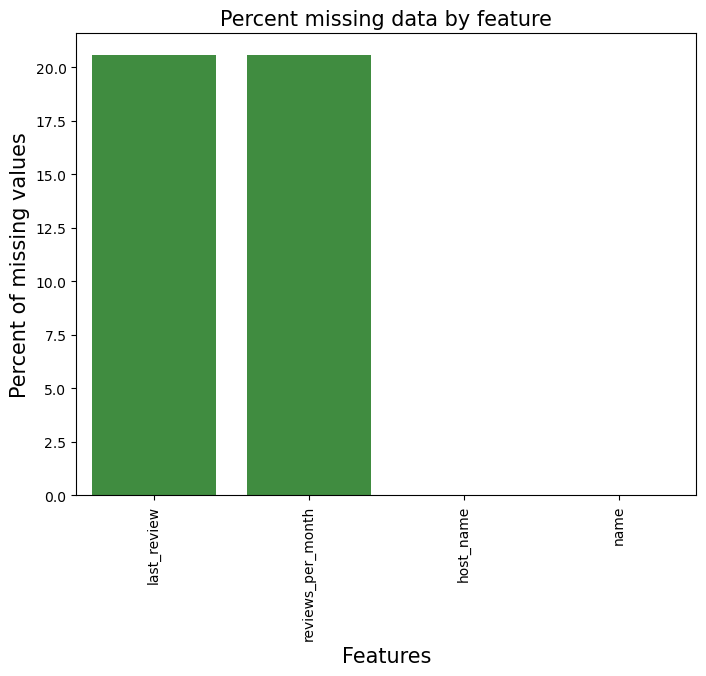

In [42]:
def missingdata(data):
    # Calculate missing values and percentages
    total = data.isnull().sum()
    percent = (data.isnull().sum() / len(data) * 100)
    
    # Create DataFrame with only features that have missing values
    ms = pd.DataFrame({'Total': total, 'Percent': percent})
    ms = ms[ms['Percent'] > 0].sort_values('Percent', ascending=False)
    
    # Create visualization
    plt.figure(figsize=(8, 6))
    sns.barplot(x=ms.index, y='Percent', data=ms, color='green', alpha=0.8)
    plt.xticks(rotation=90)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    
    return ms

missingdata(train_df)

In [44]:
train_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<Axes: >

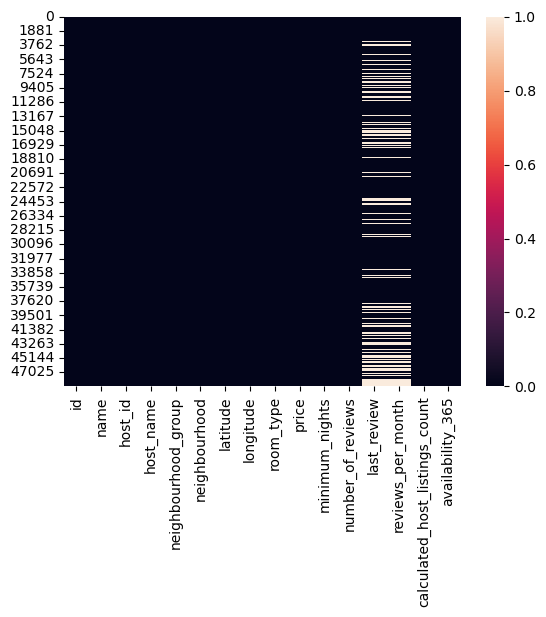

In [46]:
sns.heatmap(train_df.isnull())

In [48]:
def showMissing():
    missing = train_df.columns[train_df.isnull().any()].tolist()
    return missing

missingVal = pd.DataFrame()
missingVal['Missing Data Count'] = train_df[showMissing()].isnull().sum().sort_values(ascending = False)
missingVal['Missing Data Percentage'] = train_df[showMissing()].isnull().sum().sort_values(ascending = False)/len(train_df)*100

print(missingVal)

                   Missing Data Count  Missing Data Percentage
last_review                     10052                20.558339
reviews_per_month               10052                20.558339
host_name                          21                 0.042949
name                               16                 0.032723


In [50]:
print(f'Features : {train_df.columns.to_list()}')

Features : ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [52]:
train_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [54]:
train_df['name'].fillna('not known',inplace = True)
train_df['host_name'].fillna('not known',inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3992\1846793741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['name'].fillna('not known',inplace = True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3992\1846793741.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [56]:
train_df['reviews_per_month'].fillna(0,inplace= True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3992\2857152889.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['reviews_per_month'].fillna(0,inplace= True)


In [58]:
train_df.drop(['id', 'last_review'], axis=1,inplace = True)
train_df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [60]:
plt.figure(figsize=(7,5))
sns.histplot(df["price"], bins=50, kde=True, color="blue")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Airbnb Prices")
plt.show()


NameError: name 'df' is not defined

<Figure size 700x500 with 0 Axes>

In [62]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df["number_of_reviews"], y=df["price"], alpha=0.5)
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.title("Price vs. Number of Reviews")
plt.show()

NameError: name 'df' is not defined

<Figure size 700x500 with 0 Axes>

Text(0.5, 1.0, 'Price Distribution')

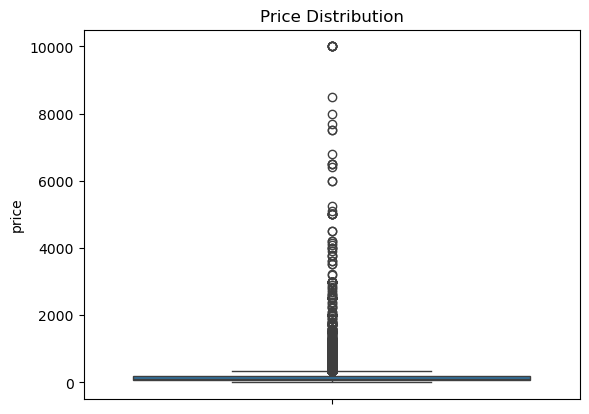

In [64]:
sns.boxplot(y='price', data=train_df).set_title('Price Distribution')

In [66]:
top_10_hosts=train_df['host_name'].value_counts()[:10]

Text(0.5, 1.0, 'top 10 hosts on the basis of no of listings in entire NYC!')

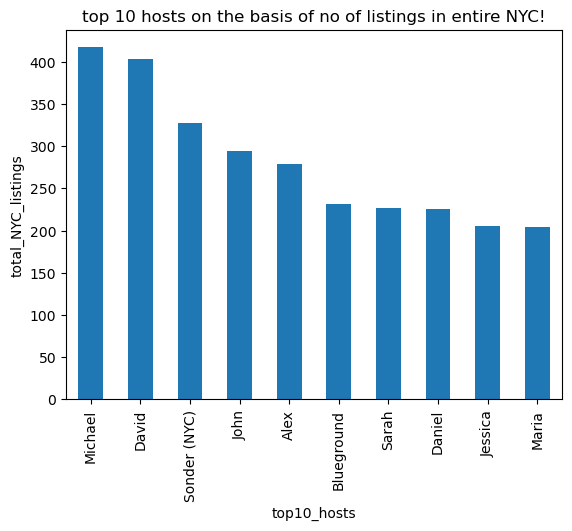

In [68]:
top_10_hosts.plot(kind='bar')
plt.xlabel('top10_hosts')
plt.ylabel('total_NYC_listings')
plt.title('top 10 hosts on the basis of no of listings in entire NYC!')

Text(0.5, 1.0, 'Count of no of listings in entire NYC of each neighbourhood group!')

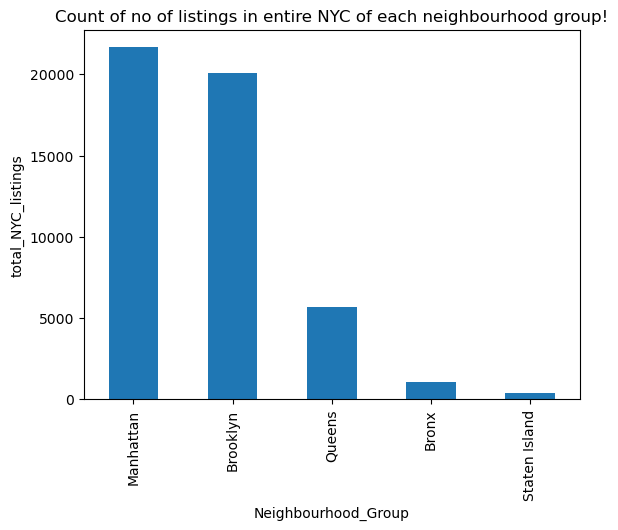

In [70]:
train_df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.xlabel('Neighbourhood_Group')
plt.ylabel('total_NYC_listings')
plt.title('Count of no of listings in entire NYC of each neighbourhood group!')

Text(0.5, 1.0, 'count of each room types in entire NYC')

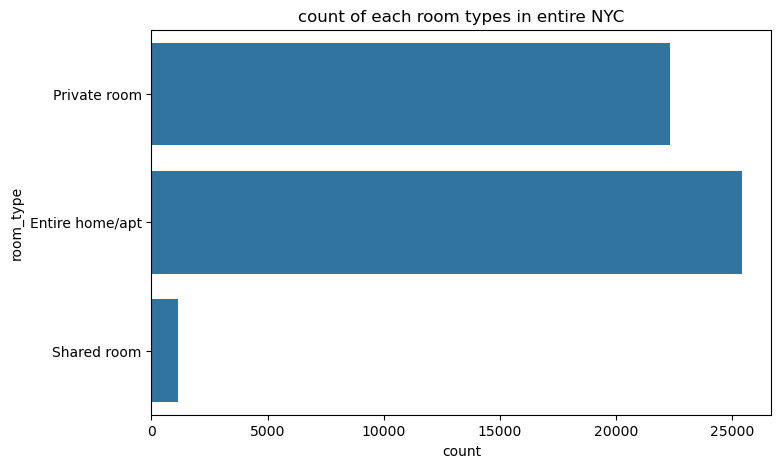

In [72]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.countplot(train_df['room_type'])
plt.title('count of each room types in entire NYC')

Text(0.5, 1.0, 'count of room types of each neighbourhood group in entire NYC')

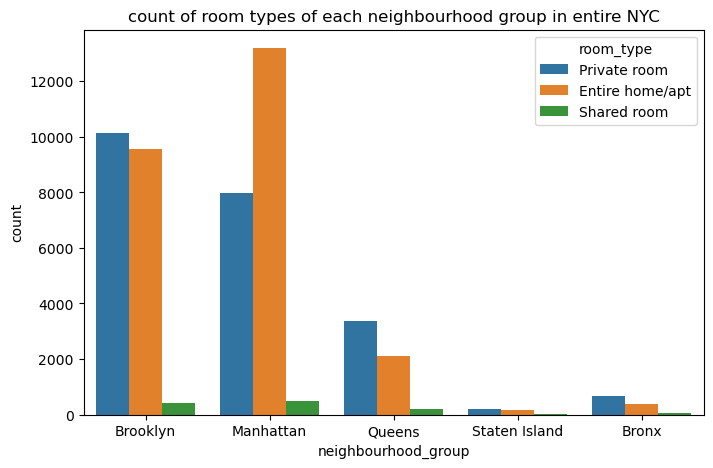

In [74]:
ax = sns.countplot(x="neighbourhood_group",hue="room_type", data=train_df)
ax.set_title('count of room types of each neighbourhood group in entire NYC')

<Axes: >

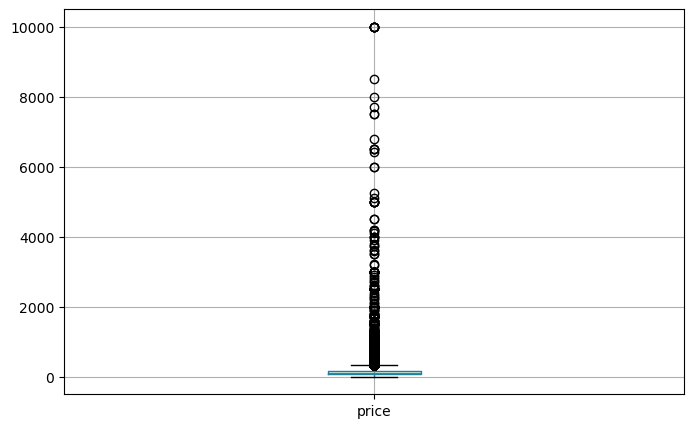

In [77]:
train_df.boxplot(column='price')

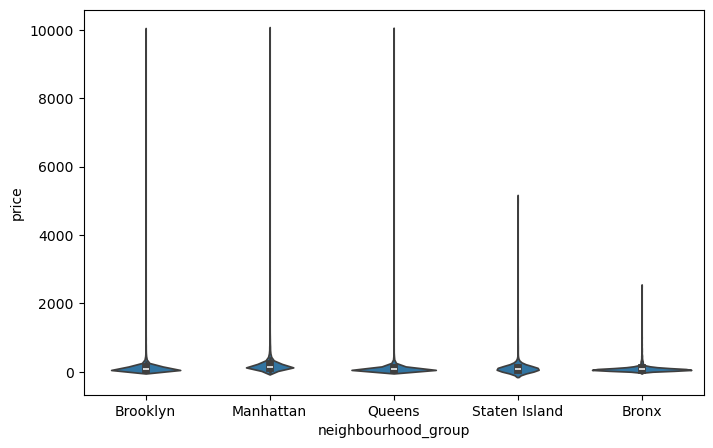

In [79]:
ax= sns.violinplot(x='neighbourhood_group',y='price',data=train_df)

In [81]:
#outlier treatment
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range
lower_bound,upper_bound = outlier_treatment(train_df['price'])

In [83]:
train_df[(train_df.price < lower_bound) | (train_df.price > upper_bound)]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0.12,1,180
85,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7
103,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0.55,2,243
114,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0.06,4,298
121,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0.00,1,364
48833,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0.00,1,64
48839,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0.00,1,23
48842,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0.00,1,9


<Axes: >

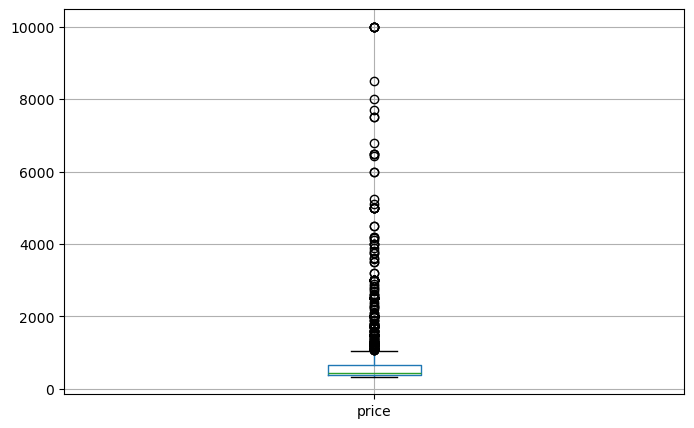

In [85]:
trin_df3=train_df[(train_df.price < lower_bound) | (train_df.price > upper_bound)]
trin_df3.boxplot(column='price')

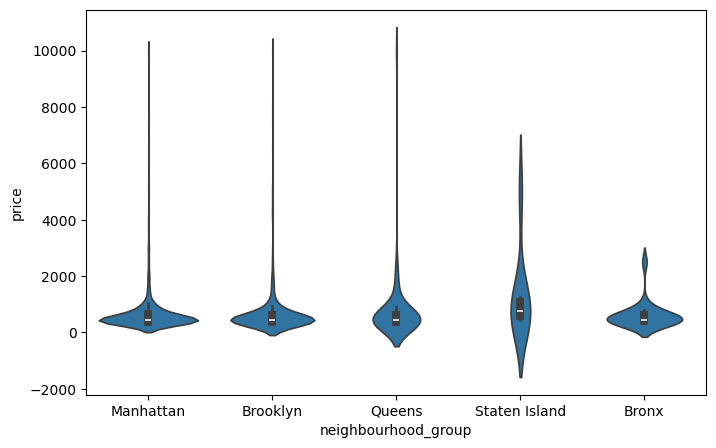

In [87]:
ax=sns.violinplot(x='neighbourhood_group',y='price',data=trin_df3)

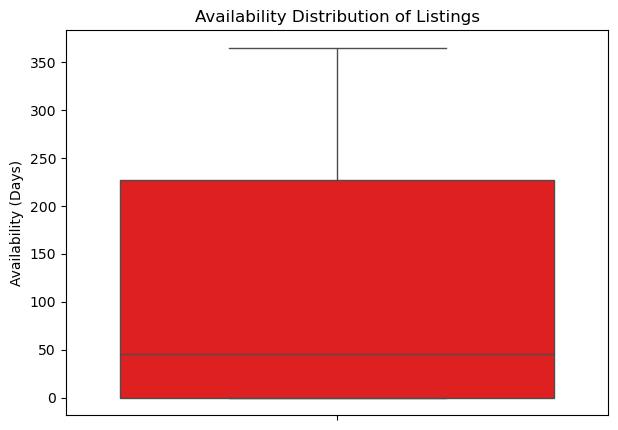

In [91]:
plt.figure(figsize=(7,5))
sns.boxplot(y=train_df["availability_365"], color="red")
plt.ylabel("Availability (Days)")
plt.title("Availability Distribution of Listings")
plt.show()


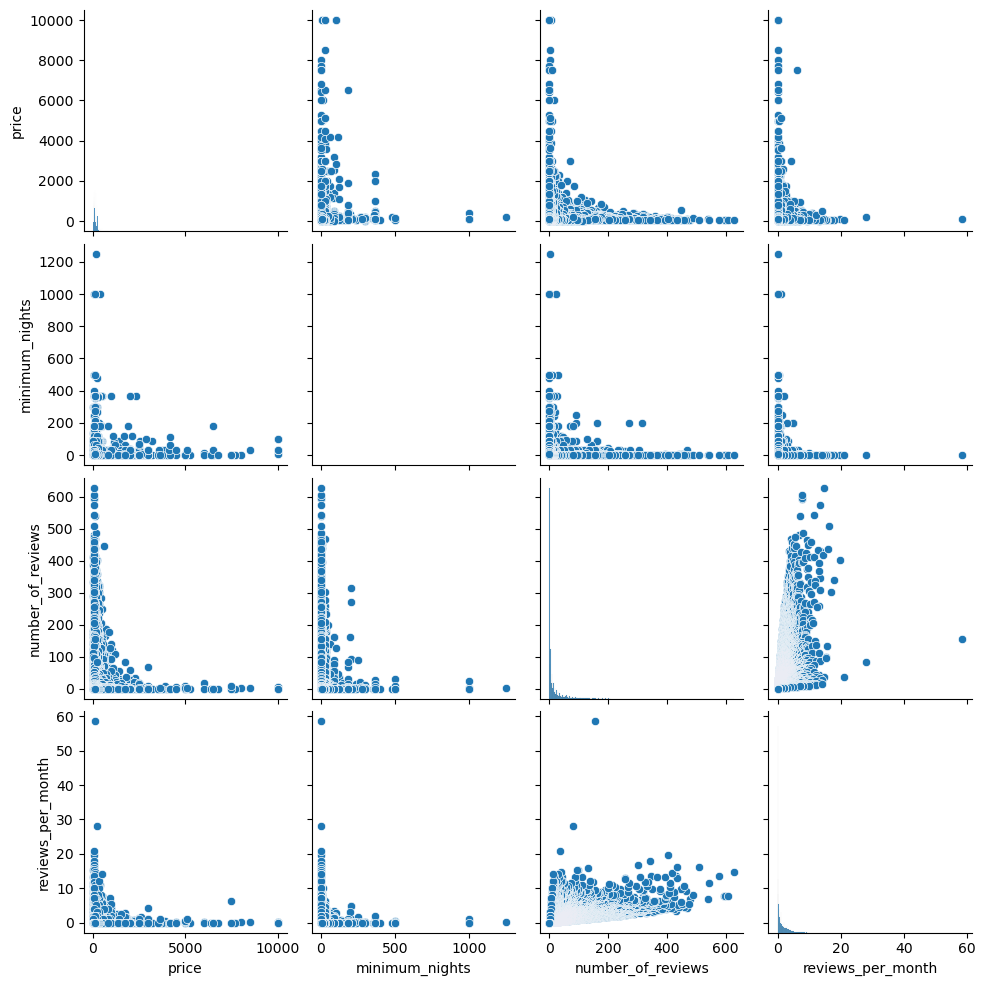

In [96]:
sns.pairplot(train_df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']])
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3992\935119228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=train_df["room_type"], y=train_df["price"], palette="coolwarm")


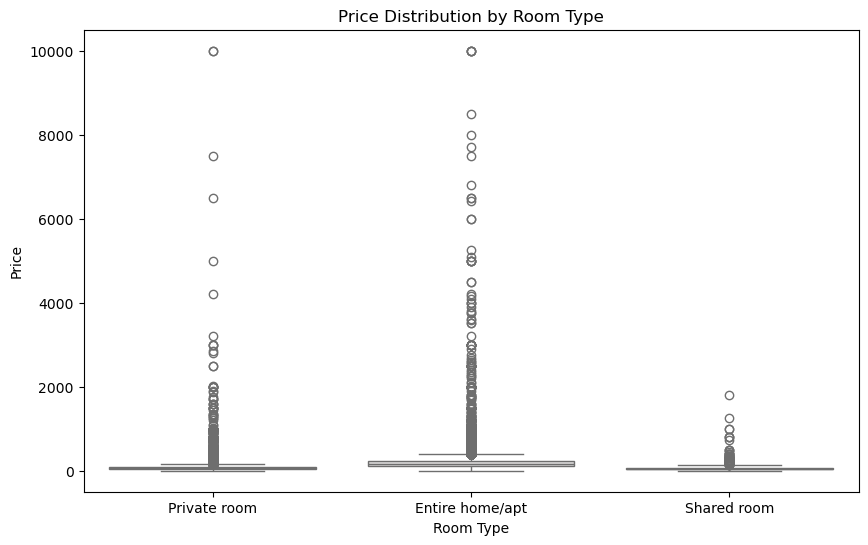

In [99]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train_df["room_type"], y=train_df["price"], palette="coolwarm")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.title("Price Distribution by Room Type")
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3992\2234855885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=train_df, x='neighbourhood_group',y='availability_365',palette='plasma')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3992\2234855885.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), size = '15')


[Text(0, 0, 'Brooklyn'),
 Text(1, 0, 'Manhattan'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Staten Island'),
 Text(4, 0, 'Bronx')]

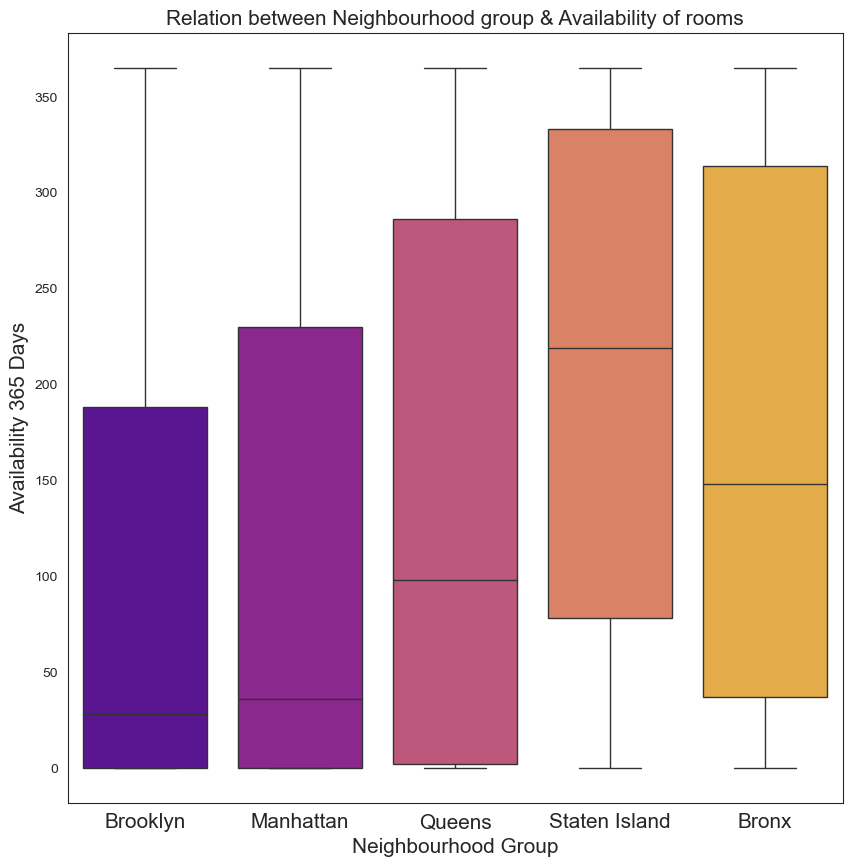

In [101]:
plt.figure(figsize=(10,10))
sns.set_style('white')

ax = sns.boxplot(data=train_df, x='neighbourhood_group',y='availability_365',palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('15')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days').set_fontsize('15')
ax.set_xlabel('Neighbourhood Group').set_fontsize('15')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '15')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

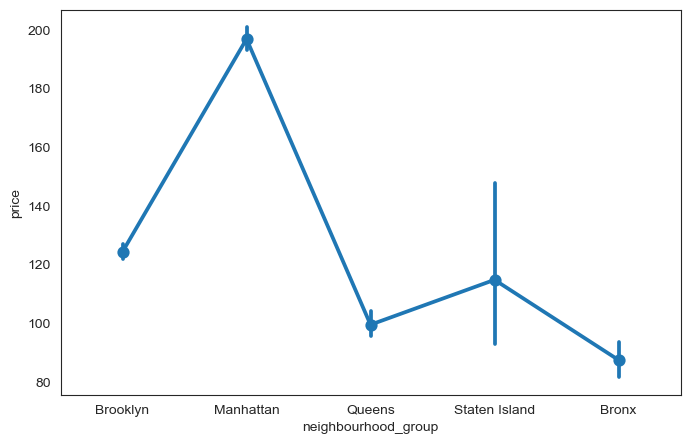

In [103]:
sns.pointplot(x = 'neighbourhood_group', y='price', data=train_df)

In [ ]:
train_df.plot.bar(x='neighbourhood', rot=90, title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')"
plt.show()

NameError: name 'train_df' is not defined